<a href="https://colab.research.google.com/github/aditicsds/PREDICTION-OF-EMPLOYEE-ATTRITION/blob/main/PEA_working_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Unique values in 'Attrition' column: ['Yes' 'No']
Accuracy Score: 0.8684807256235828
Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.99      0.93       380
        True       0.71      0.08      0.15        61

    accuracy                           0.87       441
   macro avg       0.79      0.54      0.54       441
weighted avg       0.85      0.87      0.82       441

Confusion Matrix:
 [[378   2]
 [ 56   5]]


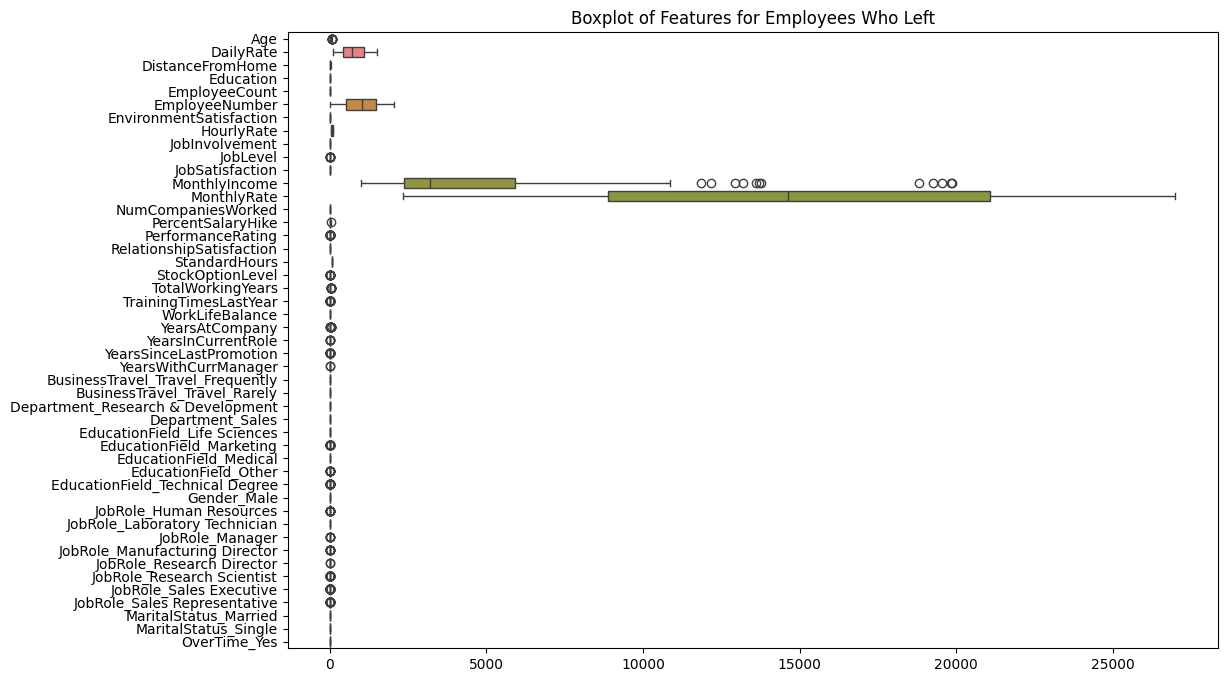

Prediction (0 = No Attrition, 1 = Attrition): [False]


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

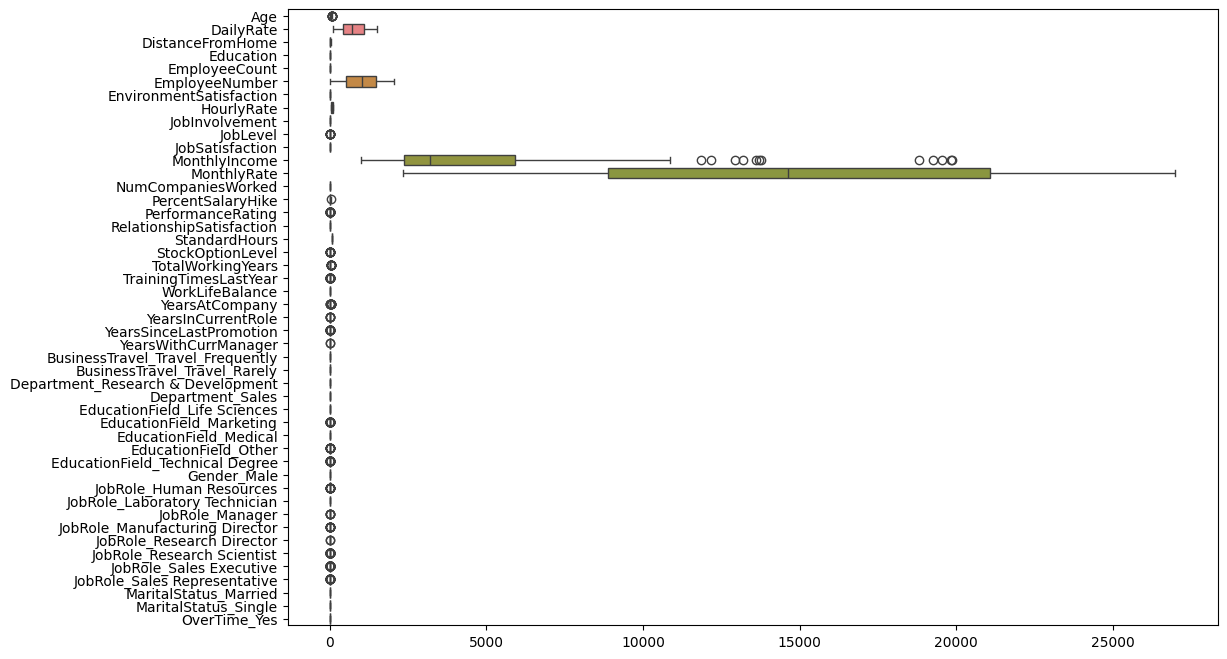

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load the dataset
df = pd.read_csv('/content/dataset.csv')

# Verify if 'Attrition' column exists and print its unique values
if 'Attrition' in df.columns:
    print("Unique values in 'Attrition' column:", df['Attrition'].unique())
else:
    print("Error: 'Attrition' column not found in the dataset.")
    # Investigate further: Check file path, file content, etc.

# Step 2: Preprocess the data
# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

attrition_column = [col for col in df.columns if 'Attrition' in col][0]
X = df.drop(attrition_column, axis=1)  # Features
y = df[attrition_column]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Get the column names before scaling
X_train_columns = X_train.columns  # Store column names for later use

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 5: Analyze reasons for employees who left the job
# Filter the original dataset for employees who left (Attrition = 1)
employees_left = df[df[attrition_column] == 1]  # Use attrition_column here

# Drop the attrition column since it's not needed for analysis
employees_left = employees_left.drop(attrition_column, axis=1)

# Visualize potential reasons for attrition using seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(data=employees_left, orient="h")
plt.title("Boxplot of Features for Employees Who Left")
plt.show()

# Step 6: Making predictions on new employees
new_data = pd.DataFrame({
    'Age': [34],
    'MonthlyIncome': [5000],
    'DistanceFromHome': [10],
    # Add all other relevant features here as in the dataset
})

# Make sure to apply the same preprocessing as the training data
new_data = pd.get_dummies(new_data)

# Use the stored column names from before scaling
missing_cols = set(X_train_columns) - set(new_data.columns)
for col in missing_cols:
    new_data[col] = 0  # Add missing columns and fill with 0

new_data = new_data[X_train_columns]  # Reorder columns to match X_train
new_data = scaler.transform(new_data)
prediction = model.predict(new_data)

print("Prediction (0 = No Attrition, 1 = Attrition):", prediction)

# Visualize potential reasons for attrition using seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(data=employees_left, orient="h")
plt

      JobRole  Left
0     Manager     1
1    Engineer     1
2  Technician     1
3     Manager     1
4    Engineer     1
Columns in DataFrame: Index(['JobRole', 'Left'], dtype='object')


/tmp/ipython-input-4-1998705216.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=employees_left, x='JobRole', palette='viridis')


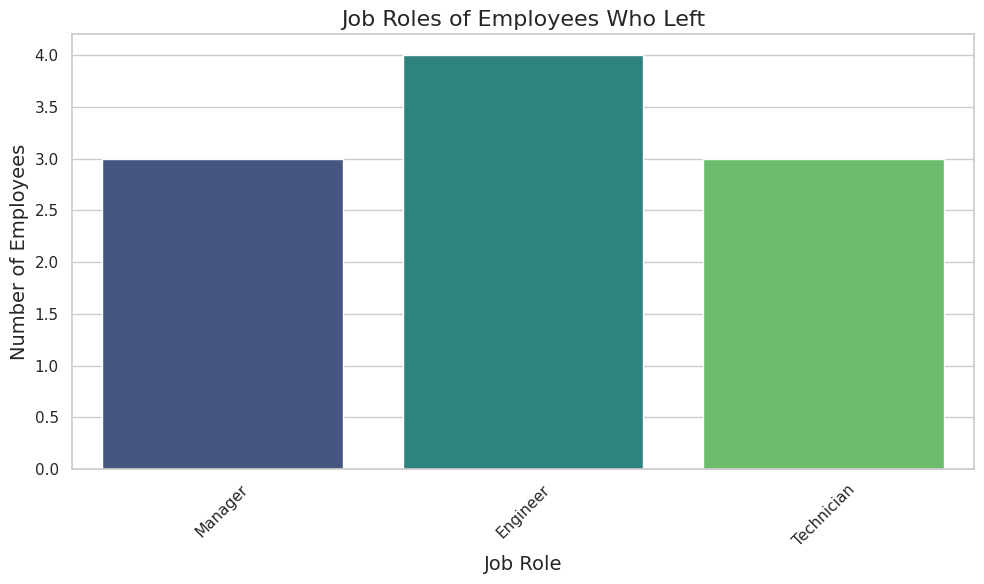

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame creation for demonstration purposes
# Uncomment the following line to load your actual DataFrame
# employees_left = pd.read_csv('your_file.csv')

# For demonstration, let's create a sample DataFrame
data = {
    'JobRole': ['Manager', 'Engineer', 'Technician', 'Manager', 'Engineer',
                'Technician', 'Engineer', 'Manager', 'Technician', 'Engineer'],
    'Left': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
}
employees_left = pd.DataFrame(data)

# Check if the DataFrame is defined and populated
if 'employees_left' in locals():
    print(employees_left.head())  # Display the first few rows

    # Check the columns
    print("Columns in DataFrame:", employees_left.columns)

    # Strip any leading/trailing spaces from column names
    employees_left.columns = employees_left.columns.str.strip()

    # Check if 'JobRole' exists
    if 'JobRole' in employees_left.columns:
        # Set the visual style of the plot
        sns.set(style="whitegrid")

        # Create the count plot
        plt.figure(figsize=(10, 6))  # Optional: Set figure size
        sns.countplot(data=employees_left, x='JobRole', palette='viridis')

        # Rotate x-ticks for better visibility
        plt.xticks(rotation=45)

        # Add title and labels
        plt.title("Job Roles of Employees Who Left", fontsize=16)
        plt.xlabel("Job Role", fontsize=14)
        plt.ylabel("Number of Employees", fontsize=14)

        # Show the plot
        plt.tight_layout()  # Adjust layout to make room for labels
        plt.show()
    else:
        print("Column 'JobRole' does not exist in the DataFrame.")
else:
    print("The DataFrame 'employees_left' is not defined.")

In [5]:
# Show the plots
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

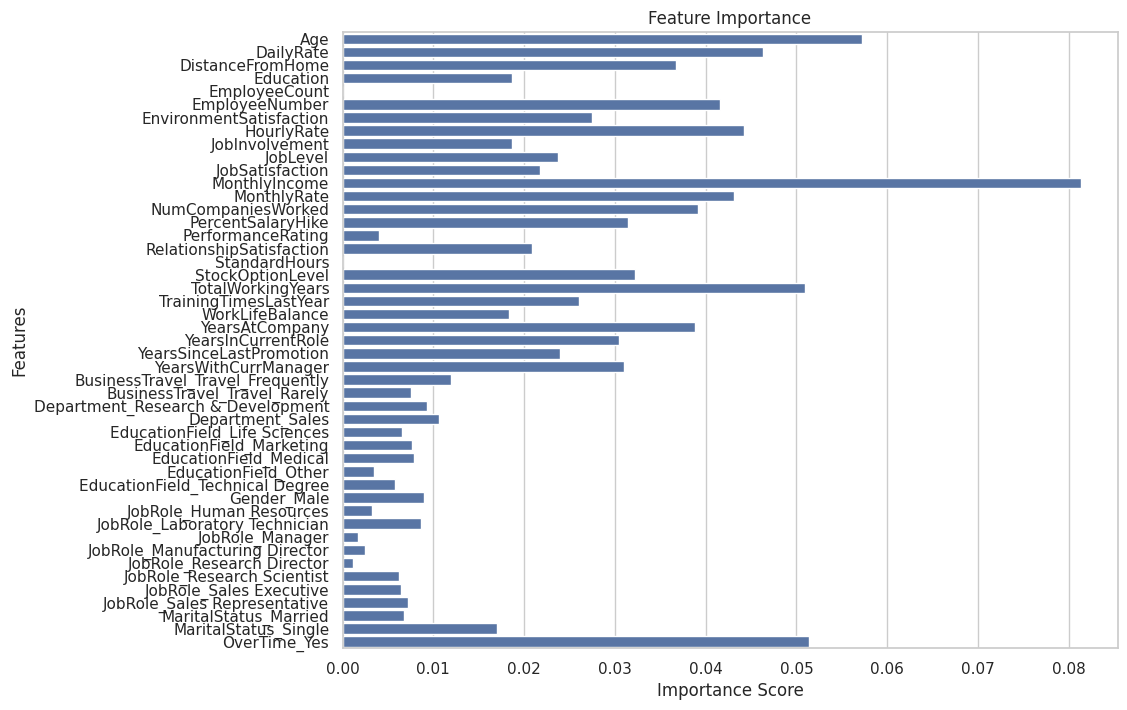

In [6]:
# Feature Importance Plot
feature_importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importance, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()